<h1>App Physics 155 - LE 2</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 2.2: The gamma function</b>

A commonly occurring function in physics calculations is the gamma function $\Gamma(a)$, which is defined by the integral

\begin{equation}
    \Gamma(a) = \int_0^\infty x^{a-1}e^{-x} dx
\end{equation}

There is no closed-form expression for the gamma function, but one can calculate its value for given a by performing the integral above numerically. You have to be careful how you do it,
however, if you wish to get an accurate answer.

a) Write a program to make a graph of the value of the integrand as a function of $x$ from $x = 0$ to $x = 5$, with three separate curves for $a$ = 2, 3, and 4, all on the same axes. You should find that the integrand starts at zero, rises to a maximum, and then decays again for each curve.

b) Show analytically that the maximum falls at $x = a − 1$.

c) Most of the area under the integrand falls near the maximum, so to get an accurate value of the gamma function we need to do a good job of this part of the integral. We can change the integral from 0 to $\infty$ to one over a finite range from 0 to 1 using the change of variables in Eq. (5.67), but this tends to squash the peak towards the edge of the $[0, 1]$ range and does a poor job of evaluating the integral accurately. We can do a better job by making a different change of variables that puts the peak in the middle of the integration range, around $\frac{1}{2}$. We will use the change of variables given in Eq. (5.69), which we repeat here for convenience:

\begin{equation}
    z = \frac{x}{c+x}
\end{equation}

For what value of $x$ does this change of variables give $z = \frac{1}{2}$? Hence what is the appropriate choice of the parameter $c$ that puts the peak of the integrand for the gamma function at $z = \frac{1}{2}$?

d) Before we can calculate the gamma function, there is another detail we need to attend to. The integrand can be difficult to evaluate because the factor $x^{a−1}$ can become very large and the factor $e^{−x}$ very small, causing numerical overflow or underflow, or both, for some values of $x$. Write $x^{a−1} = e^{(a−1)}\ln{x}$ to derive an alternative expression for the integrand that does not suffer from these problems (or at least not so much). Explain why your new expression is better than the old one.

e) Now, using the change of variables above and the value of $c$ you have chosen, write a user-defined function gamma(a) to calculate the gamma function for arbitrary argument $a$. Use whatever integration method you feel is appropriate. Test your function by using it to calculate and print the value of $\Gamma(\frac{3}{2})$, which is known to be equal to $\frac{1}{2}\sqrt{\pi} \approx 0.886$.

f) For integer values of $a$ it can be shown that $\Gamma(a)$ is equal to the factorial of $a−1$. Use your Python function to calculate $\Gamma(3)$, $\Gamma(6)$, and $\Gamma(10)$. You should get answers closely equal to $2! = 2$, $5! = 120$, and $9! = 362,880$.

In [1]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline

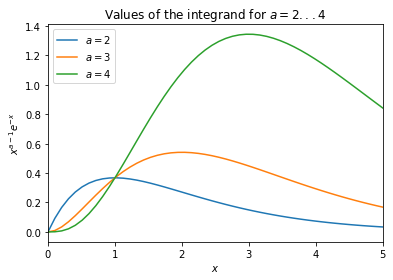

In [2]:
def I(x, a):
    return x**(a-1)*np.exp(-x)

x = np.linspace(0,5)
for n in range(2,5):
    mp.plot(x,I(x,n), label="$a=%i$" %(n))

mp.title("Values of the integrand for $a = 2...4$")
mp.xlabel("$x$")
mp.ylabel("$x^{a-1}e^{-x}$")
mp.xlim(0,5)
mp.legend()
mp.show()

In [3]:
for i in range(2,5):
    print("a = %i maximum at x = %.4f" %(i,x[np.argmax(I(x,i))]))

a = 2 maximum at x = 1.0204
a = 3 maximum at x = 2.0408
a = 4 maximum at x = 2.9592


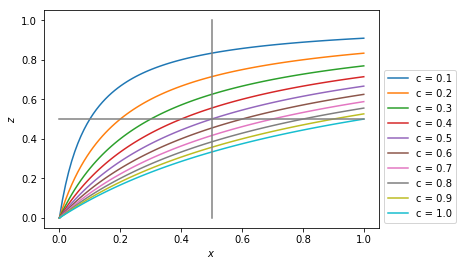

In [67]:
x = np.linspace(0,1,100)
for c in np.arange(0.1,1.1,0.1):
    z = x/(c+x)
    mp.plot(x,z, label="c = %.1f" %(c))
mp.plot(x, np.ones(100)*0.5, color="gray")
mp.plot(np.ones(100)*0.5, x, color="gray")
mp.xlabel("$x$")
mp.ylabel("$z$")
mp.legend(loc="lower left", bbox_to_anchor=(1,0))
mp.show()

The value for $c$ that would put the peak at around $\frac{1}{2}$ is at $c = 0.5$.

In [113]:
def I2(x,a):
    return np.exp((a-1)*np.log(x) - x)

#z = x/(c+x)
#dz = dx
#x = zc/(1-z)
#(zc/(1-z))^(a-1)*e^(-(zc/(1-z))) dz

def I3(z,a):
    c = 0.5
    return np.exp((a-1)*np.log(z*c/(1-z)) - z*c/(1-z))

def gamma(a):
    N = 100000
    lowb = 0.0
    upb = 100.
    h = (upb-lowb)/N
    suma = 0.0
    s = I(lowb,a)+I(upb,a)
    for k in range(1,N//2 + 1):
        s += I(lowb+(2*k - 1)*h,a) * 4
    for k in range(1,N//2):
        s += I(lowb + 2*k*h,a) * 2
    suma += 1/3*h*s
    return suma

In [116]:
gamtest = [3/2 , 3 , 6 , 10]
for i in gamtest:
    print("gamma(", i, ") = ", gamma(i))

gamma( 1.5 ) =  0.886224357724
gamma( 3 ) =  2.0
gamma( 6 ) =  120.0
gamma( 10 ) =  362880.0
